In [1]:
from pandas_datareader import data as pdr
from yahoo_fin import stock_info as si
import yfinance as yf
import pandas as pd
import datetime
import time
import talib
from talib import *
import matplotlib.pyplot as plt
import math
import numpy as np
import os
from LSSVMRegression import LSSVMRegression
os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'
yf.pdr_override()

In [2]:
def add_indicators():
        
    R_S_I = RSI(df['Adj Close'], timeperiod=slow)
    E_M_A = EMA(df['Adj Close'], timeperiod=fast)
    macd, macdsig, macdhist = MACD(df['Adj Close'], fastperiod=fast, slowperiod=slow, signalperiod=really_fast)
    mfi = MFI(df['High'], df['Low'], df['Adj Close'],df['Volume'],timeperiod=fast)
    slowk, slowd = STOCH(df['High'], df['Low'], df['Adj Close'], fastk_period=fast, 
                         slowk_period=slow, slowk_matype=0, slowd_period=slow, slowd_matype=0)
    
    df['range_o_h'] = df['Open'] - df['High']
    df['range_o_l'] = df['Open'] - df['Low']
    df['range_h_l'] = df['High'] - df['Low']
    
    
    #
    #
    #
    
    df['ema'] = E_M_A
    df['rsi'] = R_S_I
    df['macd'] = macd
    df['macdsig'] = macdsig
    df['macdhist'] = macdhist
    df['mfi'] = mfi
    df['slowK'] = slowk
    df['slowD'] = slowd
    
    
    
    ####
    
    

    #76 vars

    #are_all_zero = (test_TA == 0).all()
    #true if all values are 0
    #false if contain a non 0'''

    #df.drop(['Close'], axis =1, inplace = True)

    

In [3]:
stock = 'BA'
df = pd.read_csv(r'C:\Users\Michael\Desktop\Python\Stonks\Data_Scrape\file_storage\US1.BA_200319_210319.txt'
                 , parse_dates = [['<DATE>', '<TIME>']])
df.columns = ['datetime','Open','High','Low','Adj Close','Volume']

df = df.set_index(['datetime'])

In [4]:
# 390 intervals / day < 1 min intervals
# 390 < 1 day, 780 < 2 day, 1170 < 3 days, 1560 < 4 day, 1950 < 5 days
# 2340 < 6 days, 2730 < 7 days, 3120 < 8 days, 3510 < 9 days,
# 3900 < 10 days, 4290 < 11 days, 4680 < 12 days, 5070 < 13 days,
# 5460 < 14 days, 5850 < 15 days, 6240 < 16 days, 6630 < 17 days,
                                            # there are more intervals that we can use / change
really_fast = 30
fast = 60
slow = 90

add_indicators()

# Convert Date column to datetime
df.reset_index(level=0, inplace=True)

# Change all column headings to be lower case, and remove spacing
df.columns = [str(x).lower().replace(' ', '_') for x in df.columns]

df['order_day'] = [x for x in list(range(len(df)))]
# merging_keys


# Get difference between high and low of each day

In [5]:
merging_keys = ['order_day']

##num_interval_lag = 30

#df = add_lag(num_interval_lag, df)

#df['adj_close'] = df['adj_close'].shift(30)

In [6]:
df.head(5)

,datetime,open,high,low,adj_close,volume,range_o_h,range_o_l,range_h_l,ema,rsi,macd,macdsig,macdhist,mfi,slowk,slowd,order_day
0,2020-03-19 16:31:00,99.02,99.02,97.50,97.50,2300,0.00,1.52,1.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2020-03-19 16:32:00,97.50,97.50,95.25,95.25,11658,0.00,2.25,2.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2020-03-19 16:33:00,95.35,95.35,94.21,94.21,12615,0.00,1.14,1.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,2020-03-19 16:34:00,94.40,94.61,93.00,93.04,12875,-0.21,1.40,1.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,2020-03-19 16:35:00,93.21,93.25,92.39,92.49,9562,-0.04,0.82,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [7]:
window_size = 60
#df['adj_close_true'] = df['adj_close']
df['adj_close_lag'] = df['adj_close'].shift(window_size)



In [8]:
df.columns.to_list()

['datetime',
 'open',
 'high',
 'low',
 'adj_close',
 'volume',
 'range_o_h',
 'range_o_l',
 'range_h_l',
 'ema',
 'rsi',
 'macd',
 'macdsig',
 'macdhist',
 'mfi',
 'slowk',
 'slowd',
 'order_day',
 'adj_close_lag']

In [9]:
df[['adj_close', 'adj_close_lag']].head(65)

,adj_close,adj_close_lag
0,97.50,NaN
1,95.25,NaN
2,94.21,NaN
3,93.04,NaN
4,92.49,NaN
...,...,...
60,100.00,97.50
61,100.87,95.25
62,100.54,94.21
63,101.18,93.04


In [10]:
dates_list = df['datetime']

In [11]:
cols_to_rem = ['open',
                 'high',
                 'low',
                 'volume',
                 'ema',
                 'rsi',
                 'macd',
                 'macdsig',
                 'macdhist',
                 'mfi',
                 'slowk',
                 'slowd',
                 'order_day']

In [12]:
close_vals_list = df['adj_close']

In [13]:
print(cols_to_rem)

['open', 'high', 'low', 'volume', 'ema', 'rsi', 'macd', 'macdsig', 'macdhist', 'mfi', 'slowk', 'slowd', 'order_day']


In [14]:
#df.drop(cols_to_rem, axis = 1, inplace = True)

In [15]:


#close_vals_list = df['adj_close']

df.fillna(0, inplace=True)

#df.fillna(0, inplace=True)

#BUY => 1, SELL => 0, HOLD => 2

num_test = int(.10*len(df))
num_train = len(df) - num_test

# Split into train, cv, and test
train = df[:num_train]
test = df[num_train:]

#print(test['datetime'].iloc[[-1]])
#print(test['test_labels'].iloc[[-1]])

train_close_vals = close_vals_list[:num_train]
test_close_vals = close_vals_list[num_train:]



#test_dates_list = test['date']
#BUY => 1, SELL => 0, HOLD => 2

In [16]:
df.shape

(94644, 19)

In [17]:
df.columns.to_list()

['datetime',
 'open',
 'high',
 'low',
 'adj_close',
 'volume',
 'range_o_h',
 'range_o_l',
 'range_h_l',
 'ema',
 'rsi',
 'macd',
 'macdsig',
 'macdhist',
 'mfi',
 'slowk',
 'slowd',
 'order_day',
 'adj_close_lag']

In [18]:
df.drop(['open', 'high','low'], axis = 1, inplace = True)

In [19]:
test_dates_list = test['datetime']

In [20]:
train_dates_list = train['datetime']

In [21]:
#cols_to_scale = add_scale(num_interval_lag)
#cols_to_scale.remove(cols_to_rem)

# Do scaling for train set
# Here we only scale the train dataset, and not the entire dataset to prevent information leak
cols_to_scale = ['range_o_h',#
                 'adj_close_lag',
                     'range_o_l',#
                     'range_h_l',#
                     'volume',#
                     'ema',#
                     'rsi',#
                     'macd',#
                     'macdsig',#
                     'macdhist',#
                     'mfi',#
                     'slowk',#
                     'slowd']#

In [22]:
#for element in cols_to_rem:

    #if element in cols_to_scale:

        #cols_to_scale.remove(element)

In [23]:
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler

In [24]:
#scaler = MinMaxScaler(feature_range=(-1,1))

scaler = StandardScaler()

scaler.fit(train[cols_to_scale])
train_scaled = scaler.transform(train[cols_to_scale])

# Convert the numpy array back into pandas dataframe

train_scaled = pd.DataFrame(train_scaled, columns=cols_to_scale)

train_scaled = train_scaled[slow:]
train = train[slow:]

In [25]:
#scaling test dataset

#scaler_2 = StandardScaler()

#test = np.array(test, dtype=np.longdouble)
#scaler_2.fit(test[cols_to_scale])
test_scaled = scaler.transform(test[cols_to_scale])

# Convert the numpy array back into pandas dataframe

test_scaled = pd.DataFrame(test_scaled, columns=cols_to_scale)

features = cols_to_scale

In [26]:
train_scaled.head(5)

,range_o_h,adj_close_lag,range_o_l,range_h_l,volume,ema,rsi,macd,macdsig,macdhist,mfi,slowk,slowd
90,-4.701264,-2.558765,-0.618132,2.926411,1.068539,-2.517229,0.038595,-0.042222,-0.04443,0.001117,0.900991,-2.534375,-2.881528
91,-0.301741,-2.554508,-0.571734,-0.207036,-0.259809,-2.517956,0.006747,-0.042222,-0.04443,0.001117,0.958066,-2.534375,-2.881528
92,-2.214577,-2.506365,-0.618132,1.135870,0.637637,-2.518196,0.061725,-0.042222,-0.04443,0.001117,0.936113,-2.534375,-2.881528
93,0.606857,-2.525033,2.815306,1.652372,0.370328,-2.519096,-0.018021,-0.042222,-0.04443,0.001117,0.859351,-2.534375,-2.881528
94,0.606857,-2.511933,0.634609,0.033998,0.804081,-2.520354,-0.064179,-0.042222,-0.04443,0.001117,0.780056,-2.534375,-2.881528


In [27]:
#features.remove(target)

# Split into X and y

X_train = train_scaled[features]
y_train = train['adj_close']

X_test = test_scaled[features]
y_test = test['adj_close']

#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle = False) # 0.25 x 0.8 = 0.2

In [28]:
X_train.head(5)

,range_o_h,adj_close_lag,range_o_l,range_h_l,volume,ema,rsi,macd,macdsig,macdhist,mfi,slowk,slowd
90,-4.701264,-2.558765,-0.618132,2.926411,1.068539,-2.517229,0.038595,-0.042222,-0.04443,0.001117,0.900991,-2.534375,-2.881528
91,-0.301741,-2.554508,-0.571734,-0.207036,-0.259809,-2.517956,0.006747,-0.042222,-0.04443,0.001117,0.958066,-2.534375,-2.881528
92,-2.214577,-2.506365,-0.618132,1.135870,0.637637,-2.518196,0.061725,-0.042222,-0.04443,0.001117,0.936113,-2.534375,-2.881528
93,0.606857,-2.525033,2.815306,1.652372,0.370328,-2.519096,-0.018021,-0.042222,-0.04443,0.001117,0.859351,-2.534375,-2.881528
94,0.606857,-2.511933,0.634609,0.033998,0.804081,-2.520354,-0.064179,-0.042222,-0.04443,0.001117,0.780056,-2.534375,-2.881528


In [29]:
y_train.head(5)

90    97.67
91    97.42
92    97.85
93    97.23
94    96.87
Name: adj_close, dtype: float64

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

In [31]:
reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)

GradientBoostingRegressor()

In [32]:
preds = reg.predict(X_test)

In [33]:
preds

array([212.16077471, 212.04566975, 212.04566975, ..., 240.32072178,
       239.845576  , 240.55307665])

In [34]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(test_close_vals, preds)

5.884873021930827

In [35]:
print(type(test_dates_list))

<class 'pandas.core.series.Series'>


In [36]:
test_dates_pred = test_dates_list.shift(window_size)

In [37]:
print(type(test_close_vals))

<class 'pandas.core.series.Series'>


In [38]:
test_close_vals.tail(65)

94579    255.760
94580    255.540
94581    255.710
94582    255.735
94583    256.140
          ...   
94639    255.210
94640    255.150
94641    255.420
94642    255.110
94643    255.820
Name: adj_close, Length: 65, dtype: float64

<IPython.core.display.Javascript object>


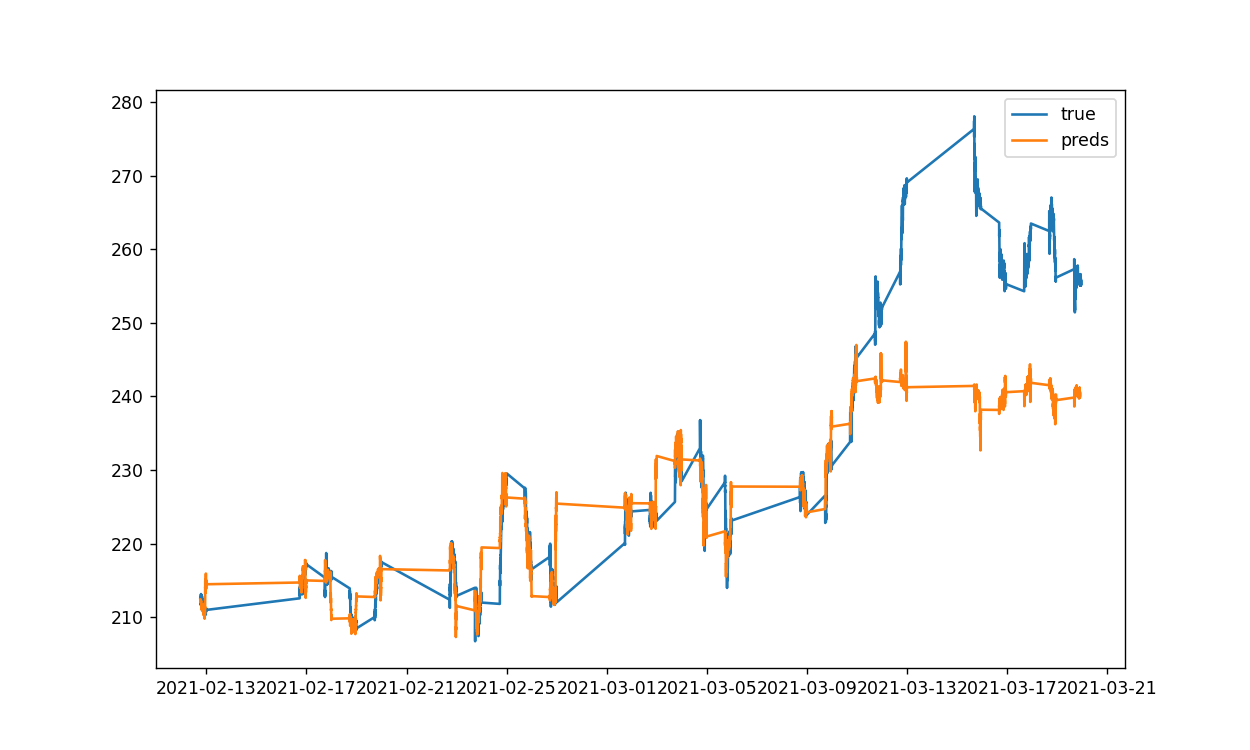

In [39]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [10, 6]

plt.plot(test_dates_list, test_close_vals)
plt.plot(test_dates_pred, preds)

plt.legend(['true', 'preds'])



In [40]:
from sklearn.ensemble import AdaBoostRegressor

reg_ada = AdaBoostRegressor(random_state=0, n_estimators=100)

In [41]:
reg_ada.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=0)

In [42]:
preds_ada = reg_ada.predict(X_test)



from sklearn.metrics import mean_absolute_error

mean_absolute_error(test_close_vals, preds_ada)


9.311044675533438

<IPython.core.display.Javascript object>


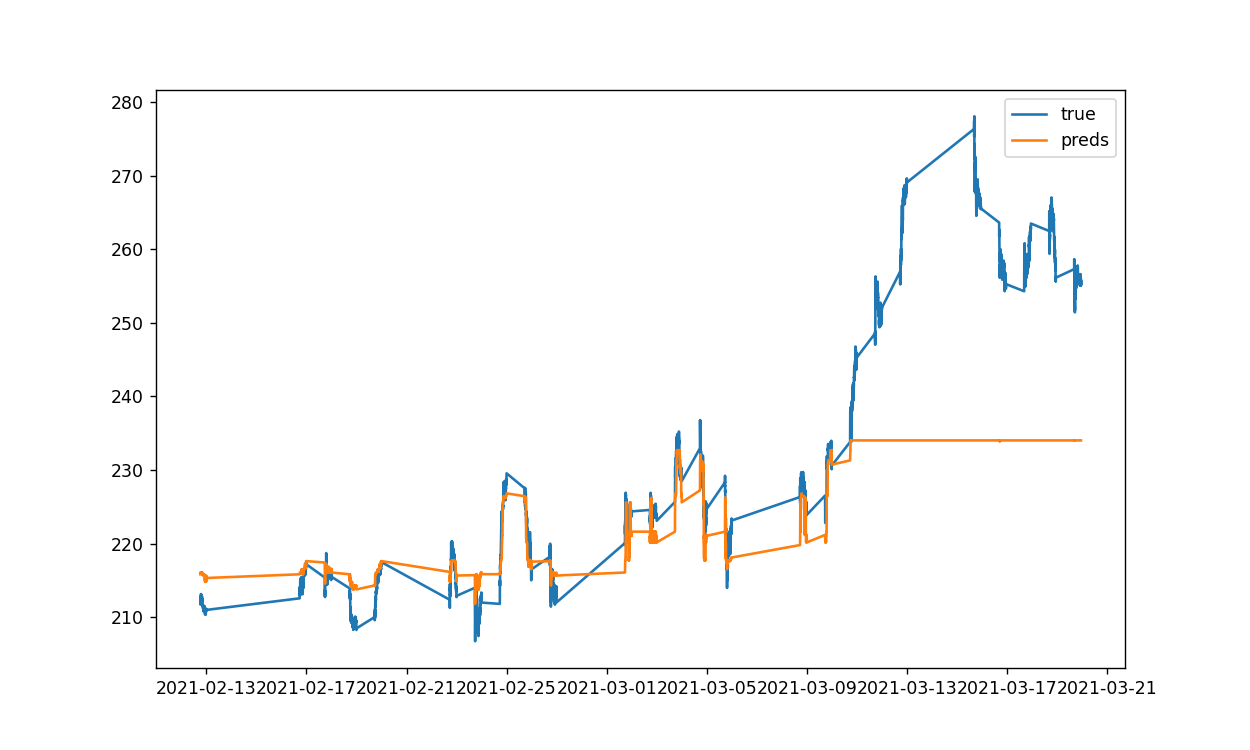

In [43]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [10, 6]

plt.plot(test_dates_list, test_close_vals)
plt.plot(test_dates_list, preds_ada)

plt.legend(['true', 'preds'])

In [44]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

hist = HistGradientBoostingRegressor().fit(X_train, y_train)

In [45]:
preds_hist = hist.predict(X_test)



from sklearn.metrics import mean_absolute_error

mean_absolute_error(test_close_vals, preds_hist)



5.983890407057353

<IPython.core.display.Javascript object>


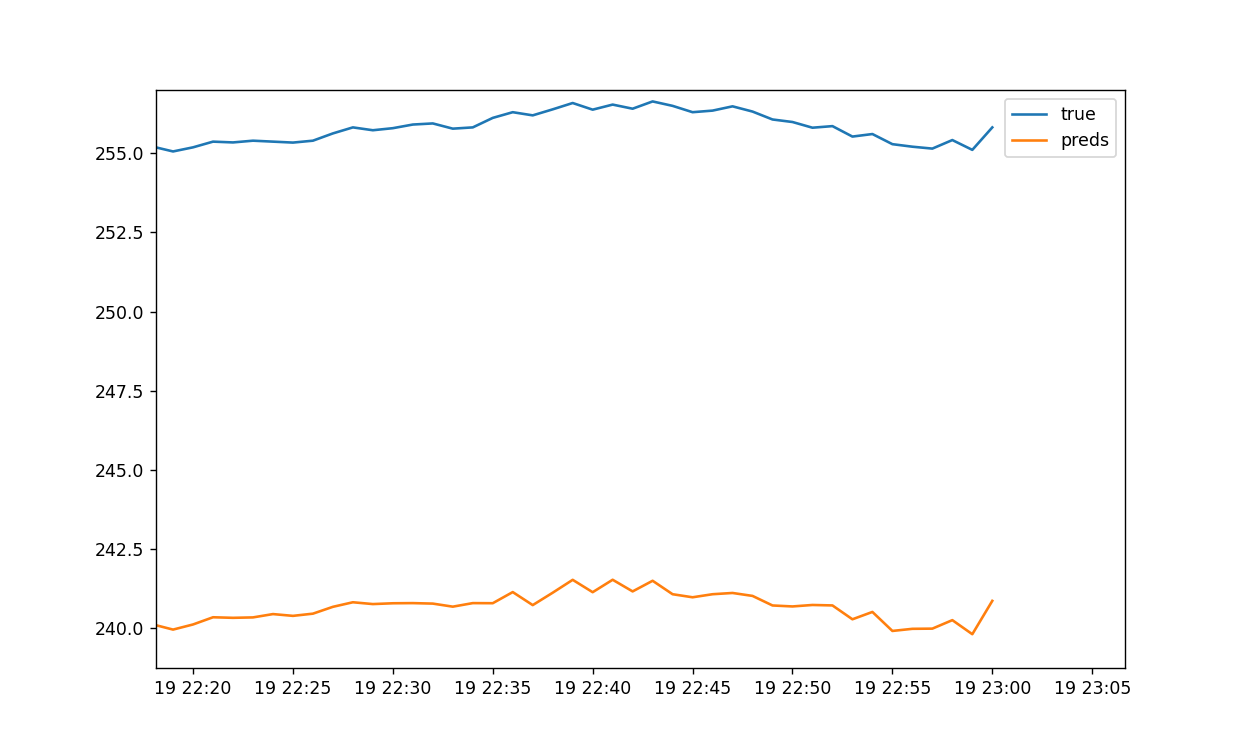

In [46]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [10, 6]

plt.plot(test_dates_list, test_close_vals)
plt.plot(test_dates_list, preds_hist)

plt.legend(['true', 'preds'])